In [1]:
import altair as alt
import pandas as pd
import numpy as np

def springer_serif_theme():
    return {
        "config": {
            "view": {"background": "white", "stroke": "transparent"},
            "title": {
                "font": "sans-serif", 
                "fontSize": 18, 
                # "anchor": "start", 
                "anchor": "middle",
                "color": "#333333"
            },
            "axis": {
                "domainColor": "#333333",
                "grid": True, "gridColor": "#EEEEEE",
                "labelFont": "sans-serif", "labelFontSize": 12,
                "titleFont": "sans-serif", "titleFontSize": 14,
                "labelColor": "#333333", "titleColor": "#333333"
            },
            "legend": {
                "labelFont": "sans-serif", "labelFontSize": 12,
                "titleFont": "sans-serif", "titleFontSize": 14,
                "orient": "right", "titleColor": "#333333", "labelColor": "#333333"
            },
            "range": {
                "category": ["#1f77b4", "#6e0426", "#008000", "#c66300"]
            },
            "mark": {
                "opacity": 0.9, "filled": False
            }
        }
    }

alt.themes.register("springer_serif", springer_serif_theme)
alt.themes.enable("springer_serif")

<function __main__.springer_serif_theme()>

ThemeRegistry.enable('springer_serif')

In [2]:
df = pd.DataFrame({
    "x": np.linspace(0, 10, 200),
    "sin": np.sin(np.linspace(0, 10, 200) ),
    "cos": np.cos(np.linspace(0, 10, 200) - 1 * np.pi / 4),
    "sin2": np.sin(np.linspace(0, 10, 200) + 2 * np.pi / 4),
    "cos2": np.cos(np.linspace(0, 10, 200) + 1 * np.pi / 4)
})

chart = (
    alt.Chart(df)
    .transform_fold(["sin", "cos" , "sin2", "cos2"], as_=["Function", "Amplitude"])
    .mark_line(strokeWidth=2)
    .encode(
        x=alt.X("x:Q", title="X axis Title"),
        y=alt.Y("Amplitude:Q", title="Amplitude"),
        color=alt.Color("Function:N", title="Function")
    )
    .properties(
        # title="Sine vs Cosine — Springer‑style Serif Theme",
        width=600,
        height=400
    )
)

chart


alt.Chart(...)

In [4]:
# !# Install (once in your environment)
# !pip install SciencePlots


  Using cached SciencePlots-2.1.1-py3-none-any.whl.metadata (11 kB)
Using cached SciencePlots-2.1.1-py3-none-any.whl (16 kB)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scienceplots

# Use the science style and specify serif font
plt.style.use(['science', 'no-latex'])  # 'no-latex' avoids needing LaTeX
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'Palatino'],
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.linewidth': 0.8,
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
})


ModuleNotFoundError: No module named 'scienceplots'

In [ ]:
csv_filename = r"C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs\aggregator_model\commission_net\aggregator_commission_net_results_n15.csv"

df = pd.read_csv(csv_filename)  # your previously saved CSV

import os

MODEL_NAME = 'commission_net'
N_FARMERS = 15  # or however many farmers you have
output_dir_base = r"C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs" 
# Dynamic output directories
AGG_DIR = os.path.join(output_dir_base, 'aggregator_model', MODEL_NAME)
PLOT_DIR = os.path.join(output_dir_base, 'plots', 'aggregator_model', MODEL_NAME)
os.makedirs(AGG_DIR, exist_ok=True)
os.makedirs(PLOT_DIR, exist_ok=True)

df.head()

,delta1,alpha0,beta0,C_fixed,C_var,avg_farmer_payoff,avg_abs_gain,avg_pct_gain,gini_coefficient,ir_met_percentage,aggregator_profit_piA,total_farmer_value_vfN,V_potential_N,C_A_N,V_net_available_N,Surplus_N,R_N,is_in_core
0,0.25,1.25,0.0,10000,300,19556.25,-2077.083333,-9.771077,0.125917,0.0,97781.25,293343.75,405625.0,14500,391125.0,66625.0,324500.0,True


In [ ]:

x = df['delta']
palette = sns.color_palette("tab10")  # clear, complementary palette

plots = [
    ('avg_farmer_payoff', 'Avg Farmer Payoff (INR)'),
    ('avg_abs_gain', 'Avg Abs Gain (INR)'),
    ('ir_met_percentage', 'IR Met (%)'),
    ('aggregator_profit_piA', 'Aggregator Profit (INR)'),
    ('gini_coefficient', 'Gini Coefficient'),
]

for i, (col, ylabel) in enumerate(plots, 1):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, df[col], marker='o', color=palette[i-1], linewidth=2)
    ax.set_title(ylabel, fontname='Times New Roman')
    ax.set_xlabel('Aggregator Commission Rate (δ)')
    ax.set_ylabel(ylabel)
    ax.grid(True)
    fig.tight_layout()
    fname = f'{PLOT_DIR}/{MODEL_NAME}_{col}_n{N_FARMERS}.png'
    fig.savefig(fname, dpi=300)
    print(f'Saved {fname}')
    plt.close()

# Optional: Core stability plot
if 'is_in_core' in df.columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    core_numeric = df['is_in_core'].map({True: 1, False: 0, np.nan: np.nan})
    ax.plot(x, core_numeric, marker='o', linestyle='--', color=palette[5] if len(palette) > 5 else 'tab:purple')
    ax.set_title('Core Stability (1=Stable, 0=Unstable)', fontname='Times New Roman')
    ax.set_xlabel('Aggregator Commission Rate (δ)')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Unstable', 'Stable'])
    ax.set_ylim(-0.1, 1.1)
    ax.grid(True)
    fig.tight_layout()
    fname = f'{PLOT_DIR}/{MODEL_NAME}_is_in_core_n{N_FARMERS}.png'
    fig.savefig(fname, dpi=300)
    print(f'Saved {fname}')
    plt.close()


In [ ]:
# In Jupyter or script cell
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # Install and import scienceplots
# !pip install SciencePlots
import scienceplots  # required for styles to register :contentReference[oaicite:6]{index=6}

# Use science style with serif grid
plt.style.use(['science', 'grid'])  # 'science' style includes serif by default :contentReference[oaicite:7]{index=7}
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times', 'Palatino'],
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.linewidth': 0.8,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
})

# Load CSV results
MODEL_NAME = 'commission_net'
N_FARMERS = 15  # or however many farmers you have
output_dir_base = r"C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs" 
df = pd.read_csv(os.path.join(AGG_DIR, f'aggregator_{MODEL_NAME}_results_n{N_FARMERS}.csv'))
x = df['delta']
metrics = [
    ('avg_farmer_payoff', 'Avg. Farmer Payoff (INR)'),
    ('avg_abs_gain',      'Avg. Farmer Gain (INR)'),
    ('ir_met_percentage', 'IR Met (%)'),
    ('aggregator_profit_piA','Aggregator Profit πₐ(N) (INR)'),
    ('Surplus_N',         'Surplus N (INR)'),
    ('gini_coefficient',  'Gini Coefficient')
]

# complementary color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for idx, (col, ylabel) in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x, df[col], marker='o', linestyle='-', color=colors[idx % len(colors)], linewidth=2)
    if col == 'avg_abs_gain':
        ax.axhline(0, color='red', linestyle=':', linewidth=1)
    ax.set_title(ylabel)
    ax.set_xlabel(r'Aggregator Commission Rate ($\delta$)')
    ax.set_ylabel(ylabel)
    ax.grid(True)
    fig.tight_layout()
    fname = os.path.join(PLOT_DIR, f'{MODEL_NAME}_{col}_n{N_FARMERS}.png')
    fig.savefig(fname, dpi=300)
    print(f"Saved plot: {fname}")
    plt.close(fig)

# Core stability separate handling
if 'is_in_core' in df.columns:
    fig, ax = plt.subplots(figsize=(6,4))
    core_numeric = df['is_in_core'].map({True:1, False:0, None:np.nan, 'Error':np.nan, 'Not Checked':np.nan})
    ax.plot(x, core_numeric, marker='o', linestyle='--', color=colors[len(metrics) % len(colors)])
    ax.set_title('Core Stability (1=Stable, 0=Unstable)')
    ax.set_xlabel(r'Aggregator Commission Rate ($\delta$)')
    ax.set_yticks([0,1])
    ax.set_yticklabels(['Unstable','Stable'])
    ax.set_ylim(-0.1,1.1)
    ax.grid(True)
    fig.tight_layout()
    fname = os.path.join(PLOT_DIR, f'{MODEL_NAME}_is_in_core_n{N_FARMERS}.png')
    fig.savefig(fname, dpi=300)
    print(f"Saved plot: {fname}")
    plt.close(fig)


In [7]:
import pandas as pd
import altair as alt

# Step 1: Define and register the Springer Serif theme
def springer_serif_theme():
    return {
        "config": {
            "view": {"background": "white", "stroke": "transparent"},
            "title": {
                "font": "sans-serif", 
                "fontSize": 18, 
                "anchor": "middle",
                "color": "#333333"
            },
            "axis": {
                "domainColor": "#333333",
                "grid": True, "gridColor": "#EEEEEE",
                "labelFont": "sans-serif", "labelFontSize": 12,
                "titleFont": "sans-serif", "titleFontSize": 14,
                "labelColor": "#333333", "titleColor": "#333333"
            },
            "legend": {
                "labelFont": "sans-serif", "labelFontSize": 12,
                "titleFont": "sans-serif", "titleFontSize": 14,
                "orient": "right", "titleColor": "#333333", "labelColor": "#333333"
            },
            "range": {
                "category": ["#1f77b4", "#6e0426", "#008000", "#c66300"]
            },
            "mark": {
                "opacity": 0.9, "filled": False
            }
        }
    }

alt.themes.register("springer_serif", springer_serif_theme)
alt.themes.enable("springer_serif")

# Step 2: Load CSV
df = pd.read_csv(r"C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs\plots\n_farmers_12\coalition_size_analysis.csv").dropna()

# Step 3: Create charts
coalition_chart = alt.Chart(df).mark_line(point=True).encode(
    x=alt.X("Size:O", title="Coalition Size (S)"),
    y=alt.Y("Avg_Value_per_Farmer:Q", title="Average Value per Farmer (V(S)/S)"),
    tooltip=[
        alt.Tooltip("Size:O", title="Coalition Size (S)"),
        alt.Tooltip("Avg_Value_per_Farmer:Q", title="Average Value per Farmer (V(S)/S)")
    ]
).properties(title="Coalition Value per Farmer vs. Size")


coalition_error = alt.Chart(df).mark_errorbar(extent='stdev', color="#1f77b4").encode(
    x="Size:O",
    # y=alt.Y("Avg_Value_per_Farmer:Q"),
    y = "Avg_Value_per_Farmer:Q",
    yError="StdDev_Value_per_Farmer:Q"
)

shapley_chart = alt.Chart(df).mark_line(point=True, color="orange").encode(
    x=alt.X("Size:O", title="Coalition Size (S)"),
    y=alt.Y("Avg_Shapley_Value:Q", title="Average Shapley Value (within Coalition)", scale=alt.Scale(domain=[0, 50000])),
    # tooltip=["Size", "Avg_Shapley_Value"]
    tooltip=[
        alt.Tooltip("Size:O", title="Coalition Size (S)"),
        alt.Tooltip("Avg_Shapley_Value:Q", title="Average Shapley Value (within Coalition)")
    ]
).properties(title="Average Shapley Value vs. Size")

shapley_error = alt.Chart(df).mark_errorbar(extent='stdev', color="orange").encode(
    x="Size:O",
    # y=alt.Y("Avg_Shapley_Value:Q"),
    y="Avg_Shapley_Value:Q",
    yError="StdDev_Shapley_Value:Q"
)
# Apply properties to individual charts
coalition_chart = coalition_chart.properties(width=450, height=300)
coalition_error = coalition_error.properties(width=450, height=300)
shapley_chart = shapley_chart.properties(width=450, height=300)
shapley_error = shapley_error.properties(width=450, height=300)

# Combine
combined = (coalition_error + coalition_chart) | (shapley_error + shapley_chart)

# Save as PNG
combined.save("coalition_shapley_plot.png") 

# # Step 4: Combine and save as PNG
# combined = (coalition_error + coalition_chart) | (shapley_error + shapley_chart)
# combined = combined.properties(width=300, height=300)

# # Save as PNG (requires selenium or node/canvas backend)
# combined.save("coalition_shapley_plot.png")


<function __main__.springer_serif_theme()>

ThemeRegistry.enable('springer_serif')

In [3]:
# import altair_saver
# altair_saver.renderers.enable('node')  # or 'selenium'
# combined.save("coalition_shapley_plot.png")

In [1]:
!pip install -U altair
!pip install altair-saver
!pip install vl-convert-python

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
Using cached altair-5.5.0-py3-none-any.whl (731 kB)
  Attempting uninstall: altair
    Found existing installation: altair 5.0.1
    Uninstalling altair-5.0.1:
      Successfully uninstalled altair-5.0.1
  Using cached vl_convert_python-1.8.0-cp37-abi3-win_amd64.whl.metadata (5.2 kB)
Using cached vl_convert_python-1.8.0-cp37-abi3-win_amd64.whl (31.3 MB)


In [ ]:
import matplotlib.pyplot as plt

def apply_springer_sans_serif_theme():
    plt.style.use('default')
    plt.rcParams.update({
        # Font
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "font.size": 12,

        # Titles
        "axes.titlesize": 14,
        # "axes.titleweight": "regular",
        "axes.titleweight": "bold",

        # Axes labels
        "axes.labelsize": 12,
        "axes.labelcolor": "#333333",
        "axes.labelweight": "bold",
        
        # Ticks
        "xtick.color": "#333333",
        "ytick.color": "#333333",
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,

        # Spines and axes
        "axes.edgecolor": "#333333",
        "axes.linewidth": 1.0,
        "axes.grid": True,
        "grid.color": "#EEEEEE",
        "grid.linewidth": 1.0,

        # Background
        "figure.facecolor": "white",
        "axes.facecolor": "white",

        # Legends
        "legend.fontsize": 12,
        "legend.title_fontsize": 14,
        "legend.edgecolor": "#333333",

        # Lines/Markers
        "lines.linewidth": 2,
        "lines.markersize": 6,
        "lines.markeredgewidth": 1,
        # "lines.markeredgecolor": "black",
        "lines.markerfacecolor": "auto",

        # Color cycle (Altair category palette)
        "axes.prop_cycle": plt.cycler(color=["#1f77b4", "#6e0426", "#008000", "#c66300"]),
        
        # Savefig
        "savefig.facecolor": "white",
        "savefig.edgecolor": "white"
    })


def apply_springer_serif_theme():
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman", "DejaVu Serif", "Georgia"],
        "font.size": 13,
        "axes.titlesize": 15,
        "axes.labelsize": 13,
        "axes.edgecolor": "#333333",
        "axes.labelcolor": "#333333",
        "xtick.color": "#333333",
        "ytick.color": "#333333",
        "grid.color": "#EEEEEE",
        "axes.grid": True,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "figure.facecolor": "white",
        "savefig.facecolor": "white"
    })


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
custom_colors=["#1f77b4", "#6e0426", "#008000", "#c66300"]
# Load and clean data
# df = pd.read_csv("coalition_data.csv").dropna()
df = pd.read_csv(r"C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs\plots\n_farmers_12\coalition_size_analysis.csv").dropna()

# Apply the theme
# apply_springer_serif_theme()
apply_springer_sans_serif_theme()

# Extract data
x = df['Size']
y1 = df['Avg_Value_per_Farmer']
e1 = df['StdDev_Value_per_Farmer']
y2 = df['Avg_Shapley_Value']
e2 = df['StdDev_Shapley_Value']

# Plot
# fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=120)
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=1200)

for ax in axs:
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

# Plot 1: Coalition Value per Farmer
axs[0].errorbar(x, y1, yerr=e1, fmt='o-', color=custom_colors[0], capsize=4)
axs[0].set_title("Coalition Value per Farmer vs. Size")
axs[0].set_xlabel("Coalition Size (S)")
axs[0].set_ylabel("Average Value per Farmer (V(S)/S)")
# axs[0].set_ylim(0, 50000)

# Plot 2: Shapley Value
axs[1].errorbar(x, y2, yerr=e2, fmt='o-', color=custom_colors[1], capsize=4)
axs[1].set_title("Average Shapley Value vs. Size")
axs[1].set_xlabel("Coalition Size (S)")
axs[1].set_ylabel("Average Shapley Value (within Coalition)")
# axs[1].set_ylim(0, 50000)

# plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.15)
plt.savefig("coalition_shapley_matplotlib.png", bbox_inches='tight')
plt.show()


<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Coalition Value per Farmer vs. Size')

Text(0.5, 0, 'Coalition Size (S)')

Text(0, 0.5, 'Average Value per Farmer (V(S)/S)')

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Average Shapley Value vs. Size')

Text(0.5, 0, 'Coalition Size (S)')

Text(0, 0.5, 'Average Shapley Value (within Coalition)')

In [31]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': '#333333',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': '

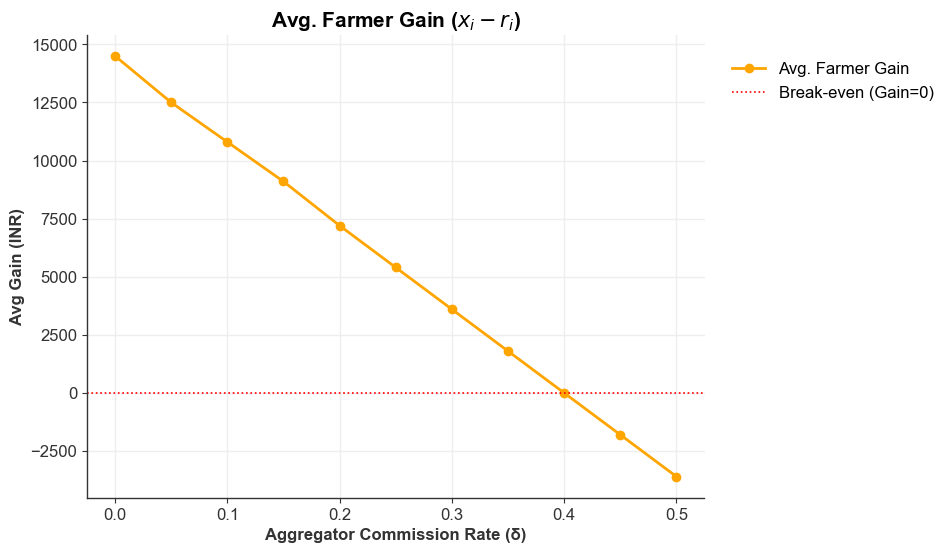

In [ ]:
import matplotlib.pyplot as plt

def plot_farmer_gain_vs_commission(x, y, save_path="avg_farmer_gain.png"):
    plt.figure(figsize=(10, 6))
    
    # Plot main line
    plt.plot(x, y, marker='o', color='orange', label='Avg. Farmer Gain')
    
    # Plot horizontal zero line
    plt.axhline(0, color='red', linestyle='dotted', linewidth=1.2, label='Break-even (Gain=0)')
    
    # Labels and title
    plt.xlabel("Aggregator Commission Rate (δ)")
    plt.ylabel("Avg Gain (INR)")
    plt.title("Avg. Farmer Gain ($x_i - r_i$)", fontsize=15)
    
    # Grid and axis
    plt.grid(True, color="#EEEEEE")
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)
    
    # Legend on right side (outside)
    plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.9), frameon=False)
    
    # Padding to the right
    plt.tight_layout(pad=2)
    plt.savefig(save_path, bbox_inches='tight', dpi=120)
    plt.show()
# Approximate extracted data
x_vals = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
y_vals = [14500, 12500, 10800, 9100, 7200, 5400, 3600, 1800, 0, -1800, -3600]

plot_farmer_gain_vs_commission(x_vals, y_vals, save_path="avg_farmer_gain_clean.png")

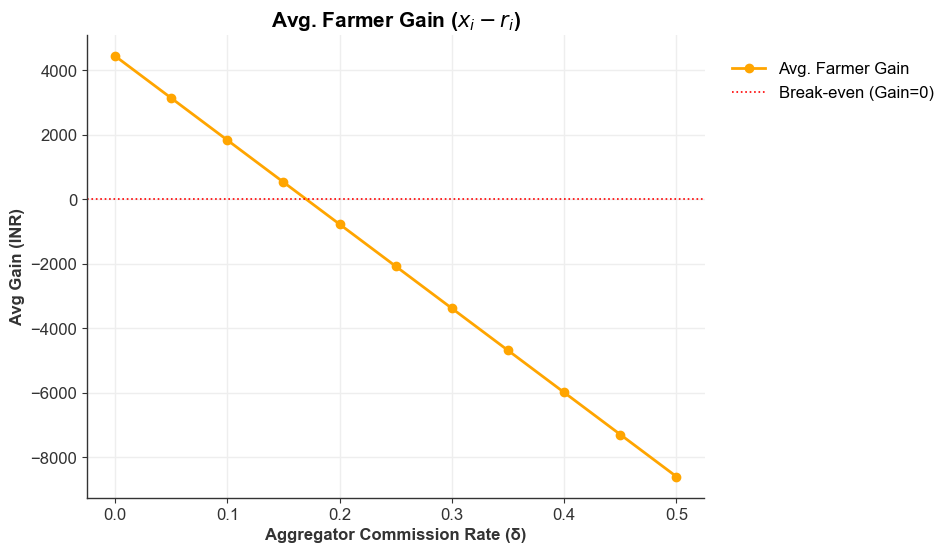

In [58]:
delta_commission = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
avg_abs_gain = [4441.67, 3137.92, 1834.17, 530.42, -773.33, -2077.08, -3380.83, -4684.58, -5988.33, -7292.08, -8595.83]

plot_farmer_gain_vs_commission(delta_commission, avg_abs_gain, save_path="avg_farmer_gain_clean.png")


In [ ]:
python  06_agg_models.py --aggregator_model commission_net --n_farmers 15 > logs/aggregator_model/commission_net/results_n15.log 2>&1 &

In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Springer-style sans-serif theme
def apply_springer_sans_serif_theme():
    plt.style.use('default')
    plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "font.size": 12,
        "axes.titlesize": 14,
        "axes.titleweight": "regular",
        "axes.labelsize": 12,
        "axes.labelcolor": "#333333",
        "xtick.color": "#333333",
        "ytick.color": "#333333",
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "axes.edgecolor": "#333333",
        "axes.linewidth": 1.0,
        "axes.grid": True,
        "grid.color": "#EEEEEE",
        "grid.linewidth": 1.0,
        "figure.facecolor": "white",
        "axes.facecolor": "white",
        "legend.fontsize": 11,
        "legend.title_fontsize": 13,
        "legend.edgecolor": "#333333",
        "lines.linewidth": 2,
        "lines.markersize": 6,
        "axes.prop_cycle": plt.cycler(color=["#1f77b4", "#6e0426", "#008000", "#c66300", "#9467bd", "#8c564b"]),
        "savefig.facecolor": "white",
        "savefig.edgecolor": "white"
    })

# Plot from CSV version of your function
def plot_aggregator_impact_from_csv(csv_filename, plot_save_dir, model_name, n_farmers, perform_core_check=True):
    apply_springer_sans_serif_theme()

    df = pd.read_csv(csv_filename)
    print(f"\n[+] Loaded data from {csv_filename}")

    fig, axes = plt.subplots(3, 2, figsize=(12, 15), sharex=True)
    fig.suptitle(f'Impact of Aggregator Commission ($\\delta$) on VCM Outcomes (N={n_farmers})', fontsize=16)

    x_axis_var = 'delta_commission'
    x_label = 'Aggregator Commission Rate ($\\delta$)'

    # Row 1
    axes[0, 0].plot(df[x_axis_var], df['avg_farmer_payoff'], marker='o')
    axes[0, 0].set_title('Avg. Farmer Payoff (Shapley on $v_F$)')
    axes[0, 0].set_ylabel('Avg Payoff (INR)')
    axes[0, 0].grid(True)

    axes[0, 1].plot(df[x_axis_var], df['avg_abs_gain'], marker='o', color='orange')
    axes[0, 1].set_title('Avg. Farmer Gain ($x_i - r_i$)')
    axes[0, 1].set_ylabel('Avg Gain (INR)')
    axes[0, 1].axhline(0, color='red', linestyle=':', linewidth=1.2, label='Break-even (Gain=0)')
    axes[0, 1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    axes[0, 1].grid(True)

    # Row 2
    axes[1, 0].plot(df[x_axis_var], df['ir_met_percentage'], marker='o', color='green')
    axes[1, 0].set_title('Farmer Participation (IR Met %)')
    axes[1, 0].set_ylabel('% Farmers with ($x_i ≥ r_i$)')
    axes[1, 0].set_ylim(-5, 105)
    axes[1, 0].grid(True)

    axes[1, 1].plot(df[x_axis_var], df['aggregator_profit_piA'], marker='o', color='purple')
    axes[1, 1].set_title('Aggregator Profit ($\\pi_A(N)$)')
    axes[1, 1].set_ylabel('Profit (INR)')
    axes[1, 1].grid(True)

    # Row 3
    axes[2, 0].plot(df[x_axis_var], df['gini_coefficient'], marker='o', color='brown')
    axes[2, 0].set_title('Fairness (Gini Coefficient of Farmer Payoffs)')
    axes[2, 0].set_ylabel('Gini Coefficient')
    axes[2, 0].grid(True)
    axes[2, 0].set_xlabel(x_label)

    if perform_core_check and 'is_in_core' in df.columns and not df['is_in_core'].isin(['Not Checked', 'Error']).all():
        core_numeric = df['is_in_core'].map({True: 1, False: 0, None: np.nan, 'Error': np.nan, 'Not Checked': np.nan})
        axes[2, 1].plot(df[x_axis_var], core_numeric, marker='o', color='cyan', linestyle='--')
        axes[2, 1].set_title('Core Stability (1=Stable, 0=Unstable)')
        axes[2, 1].set_yticks([0, 1])
        axes[2, 1].set_yticklabels(['Unstable', 'Stable'])
        axes[2, 1].set_ylim(-0.5, 1.5)
    else:
        axes[2, 1].text(0.25, 0.5, 'Core Check Not Performed\nResults Invalid', ha='center', va='center', fontsize=10, color='gray')
        axes[2, 1].set_title('Core Stability')
        axes[2, 1].set_yticks([])

    axes[2, 1].set_xlabel(x_label)
    axes[2, 1].grid(True)

    # Save and close
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
    os.makedirs(plot_save_dir, exist_ok=True)
    plot_filename = os.path.join(plot_save_dir, f'aggregator_impact_{model_name}_n{n_farmers}.png')
    plt.savefig(plot_filename, bbox_inches='tight', dpi=120)
    print(f"[+] Plot saved to {plot_filename}")
    plt.close()


In [60]:
csv_path = r"C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs\aggregator_model\aggregator_model_results_n250_delta.csv"
plot_dir = f"."
plot_aggregator_impact_from_csv(csv_path, plot_dir, model_name="MyModel", n_farmers=5)



[+] Loaded data from C:\Maha\dev\GitHub\GameTheory2025MiniProject\logs\aggregator_model\aggregator_model_results_n250_delta.csv
[+] Plot saved to .\aggregator_impact_MyModel_n5.png


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_metric_vs_delta(
    csv_path,
    output_dir,
    metric_col,
    y_label,
    title,
    color="blue",
    hline_y=None,
    hline_label=None,
    filename=None,
):
    """
    Plot a single metric vs. delta_commission from a CSV and save as a separate image.

    Parameters:
        csv_path (str): Path to the CSV file.
        output_dir (str): Directory to save the plot.
        metric_col (str): Column name in CSV to plot on Y-axis.
        y_label (str): Label for Y-axis.
        title (str): Plot title.
        color (str): Line/marker color.
        hline_y (float or None): Optional horizontal line (e.g., 0 for break-even).
        hline_label (str or None): Label for the horizontal line.
        filename (str or None): Filename to save plot (default: metric_col.png).
    """
    df = pd.read_csv(csv_path)
    x = df["delta_commission"]
    y = df[metric_col]

    plt.figure(figsize=(10, 6))

    plt.plot(x, y, marker="o", color=color, label=title)

    if hline_y is not None:
        plt.axhline(hline_y, color="red", linestyle="dotted", linewidth=1.2, label=hline_label)

    plt.xlabel("Aggregator Commission Rate (δ)")
    plt.ylabel(y_label)
    plt.title(title)

    for spine in ["top", "right"]:
        plt.gca().spines[spine].set_visible(False)

    plt.legend(loc="center left", bbox_to_anchor=(1.02, 0.9), frameon=False)
    plt.grid(True, color="#EEEEEE")
    plt.tight_layout(pad=2)

    os.makedirs(output_dir, exist_ok=True)
    if filename is None:
        filename = f"{metric_col}.png"
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path, bbox_inches="tight", dpi=120)
    print(f"[+] Saved plot: {save_path}")
    plt.close()


In [65]:
# csv_path = "./aggregator_results.csv"
output_dir = "./plots_single"

# os.mkdir(output_dir)

plots = [
    ("avg_farmer_payoff", "Avg Payoff (INR)", "Avg. Farmer Payoff (Shapley on $v_F$)", "#1f77b4", None, None),
    ("avg_abs_gain", "Avg Gain (INR)", "Avg. Farmer Gain ($x_i - r_i$)", "orange", 0, "Break-even (Gain=0)"),
    ("ir_met_percentage", "% Farmers with ($x_i ≥ r_i$)", "Farmer Participation (IR Met %)", "green", None, None),
    ("aggregator_profit_piA", "Profit (INR)", "Aggregator Profit ($\\pi_A(N)$)", "purple", None, None),
    ("gini_coefficient", "Gini Coefficient", "Fairness (Gini Coefficient of Farmer Payoffs)", "brown", None, None),
    ("is_in_core", "Stability", "Core Stability (1=Stable, 0=Unstable)", "cyan", None, None),
]

for metric, ylabel, title, color, hline, hlabel in plots:
    plot_metric_vs_delta(
        csv_path=csv_path,
        output_dir=output_dir,
        metric_col=metric,
        y_label=ylabel,
        title=title,
        color=color,
        hline_y=hline,
        hline_label=hlabel,
        filename=f"{metric}.png"
    )


[+] Saved plot: ./plots_single\avg_farmer_payoff.png
[+] Saved plot: ./plots_single\avg_abs_gain.png
[+] Saved plot: ./plots_single\ir_met_percentage.png
[+] Saved plot: ./plots_single\aggregator_profit_piA.png
[+] Saved plot: ./plots_single\gini_coefficient.png
[+] Saved plot: ./plots_single\is_in_core.png
